# Домашняя работа.
### Свёрточные нейронные сети (СНС)







In [1]:
from tensorflow.python.client import device_lib
str(device_lib.list_local_devices()[-1]).split('\n')[-2]

'physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"'

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

In [0]:
IMG_CHANNELS = 3 
IMG_ROWS, IMG_COLS = 32, 32
CLASSES = 10

EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.2


In [4]:
def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,CLASSES)

    return x_train, y_train, x_test, y_test

(X_train, y_train, X_test, y_test) = load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [0]:
def build_model(): 
    model = models.Sequential()
    
    #1st blocl
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=X_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    #2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(CLASSES, activation='softmax'))
    return model

In [6]:
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [0]:
#image augmentation
datagen = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)
datagen.fit(X_train)

In [0]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15,min_delta=0.00001)
]

In [9]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
            steps_per_epoch=int(np.ceil(X_train.shape[0] / float(BATCH_SIZE))),
            epochs=EPOCHS,
            verbose=VERBOSE,
			validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
391/391 [==============================] - 38s 98ms/step - loss: 2.0942 - accuracy: 0.3491 - val_loss: 1.6182 - val_accuracy: 0.4297
Epoch 2/50
391/391 [==============================] - 37s 96ms/step - loss: 1.5808 - accuracy: 0.4642 - val_loss: 1.4410 - val_accuracy: 0.5201
Epoch 3/50
391/391 [==============================] - 39s 99ms/step - loss: 1.4012 - accuracy: 0.5247 - val_loss: 1.1706 - val_accuracy: 0.6112
Epoch 4/50
391/391 [==============================] - 39s 99ms/step - loss: 1.2794 - accuracy: 0.5640 - val_loss: 1.2990 - val_accuracy: 0.5757
Epoch 5/50
391/391 [==============================] - 39s 100ms/step - loss: 1.1819 - accuracy: 0.5954 - val_loss: 1.0866 - val_accuracy: 0.6458
Epoch 6/50
391/391 [==============================] - 39s 100ms/step - loss: 1.0972 - accuracy: 0.6223 - val_loss: 1.0117 - val_accuracy: 0.6578
Epoch 7/50
391/391 [==============================] - 39s 99ms/step - loss: 1.0149 - accuracy: 0.6499 - val_loss: 0.8823 - val_accurac

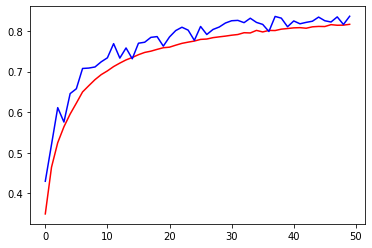

In [10]:
plt.plot(history.history['accuracy'],c = 'red')
plt.plot(history.history['val_accuracy'],c = 'blue');